In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
credit = pd.read_csv("credit_card.csv")

In [2]:
print("data null \n", credit.isnull().sum())
print("data kosong \n", credit.empty)
print("data nan \n", credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [3]:
df_credit = credit.drop(['Customer Key', 'Sl_No'], axis=1)
df_credit.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


<Axes: >

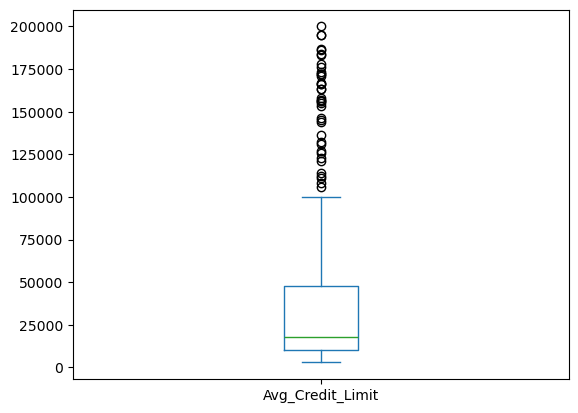

In [4]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah data sebelum dibuang outlier: 660
Jumlah data setelah dibuang outlier: 621


<Axes: >

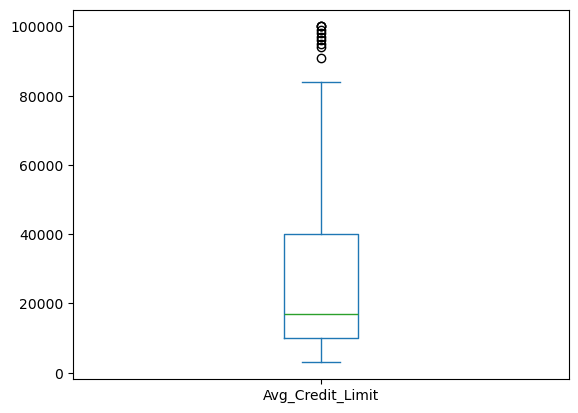

In [5]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(data_frame, kolom_outlier):
    if is_numeric_dtype(data_frame[kolom_outlier]):
        q1 = data_frame[kolom_outlier].quantile(0.25)
        q3 = data_frame[kolom_outlier].quantile(0.75)
        iqr = q3 - q1
        
        batas_atas = q3 + 1.5 * iqr
        batas_bawah = q1 - 1.5 * iqr
        
        df_credit = data_frame[(data_frame[kolom_outlier] >= batas_bawah) & (data_frame[kolom_outlier] <= batas_atas)]

    return df_credit

print("Jumlah data sebelum dibuang outlier:", df_credit.shape[0])

df_credit = remove_outlier(df_credit, 'Avg_Credit_Limit')

print("Jumlah data setelah dibuang outlier:", df_credit.shape[0])
df_credit['Avg_Credit_Limit'].plot(kind='box')



  File "d:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\Anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\Anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


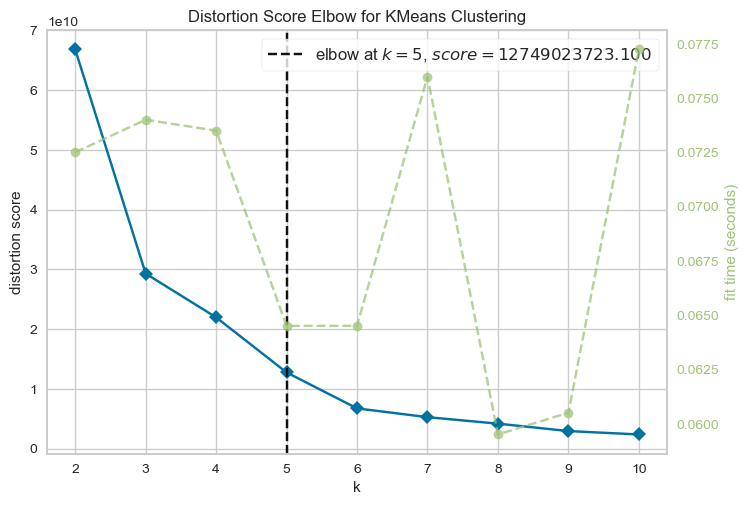

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
import warnings

warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

kMeansC = KMeans(random_state=77)
vis = KElbowVisualizer(kMeansC,k=(2,11))
vis.fit(df_credit)

vis.show()

Silhouette Score K-Means for 2 clusters: 0.7254150167909509
Silhouette Score K-Means for 3 clusters: 0.7058100919802311
Silhouette Score K-Means for 4 clusters: 0.5928895843252326
Silhouette Score K-Means for 5 clusters: 0.6039773808643728
Silhouette Score K-Means for 6 clusters: 0.6277644646724014
Silhouette Score K-Means for 7 clusters: 0.6229855664717416
Silhouette Score K-Means for 8 clusters: 0.6035680259620861
Silhouette Score K-Means for 9 clusters: 0.5989385053360569
Silhouette Score K-Means for 10 clusters: 0.6017575049440793


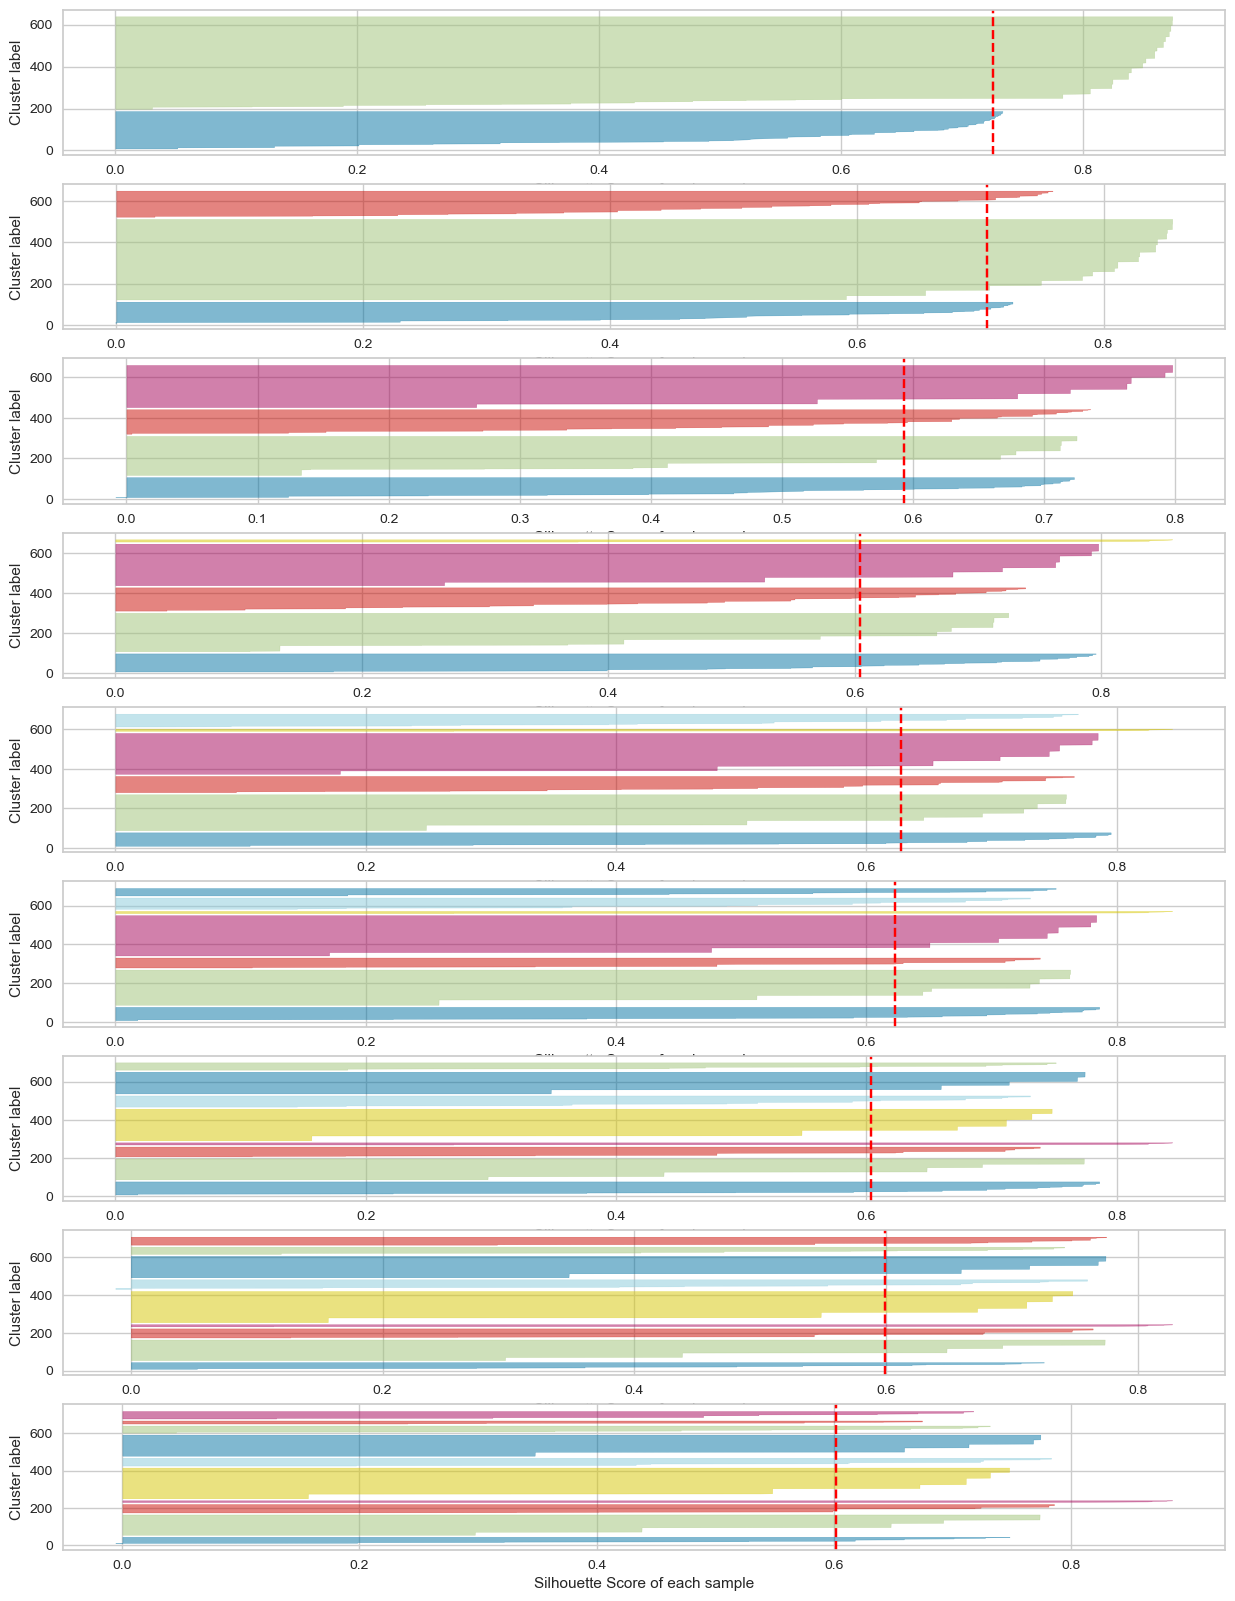

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9, 1, figsize=(15, 20))
for k in np.arange(2, 11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=77) 
    
    KM_clusters = kMeansC.fit_predict(df_credit)
    
    print("Silhouette Score K-Means for", k, "clusters:", silhouette_score(df_credit, KM_clusters))

    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(df_credit)
    
    ax[k-2].set(xlabel="Silhouette Score of each sample", ylabel="Cluster label")

plt.show()

In [8]:
df_credit.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

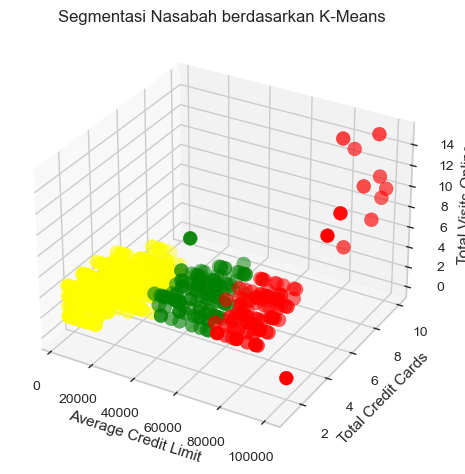

Silhouette Score K-Means: 0.706


In [9]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state = 77)
K_clusters = kmeans. fit_predict(df_credit)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4: 'magenta', 5: 'black', 6: 'cyan'}

ax.scatter(df_credit['Avg_Credit_Limit' ], df_credit['Total_Credit_Cards' ], df_credit['Total_visits_online' ], c=[cluster_colors[i] for i in K_clusters], s=100)
plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print ("Silhouette Score K-Means: %0.3f" % silhouette_score(df_credit, K_clusters))

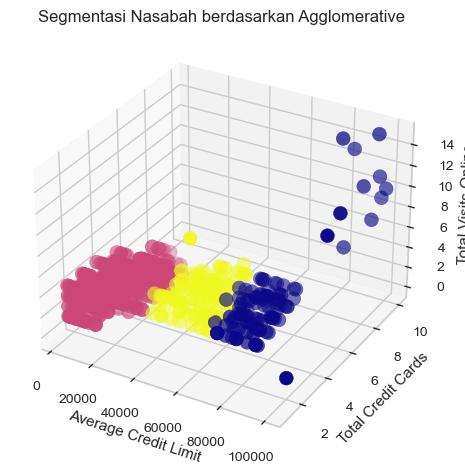

Silhouette Score K-Means: 0.705


In [10]:
import seaborn as sns
from matplotlib.colors import ListedColormap

AGG = AgglomerativeClustering(n_clusters=3,linkage='ward')

AGG_clusters = AGG.fit_predict(df_credit)
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax. scatter(df_credit['Avg_Credit_Limit'], df_credit['Total_Credit_Cards'], df_credit['Total_visits_online'],
            c=AGG_clusters, cmap=cmap, s=100)
plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(df_credit, AGG_clusters))





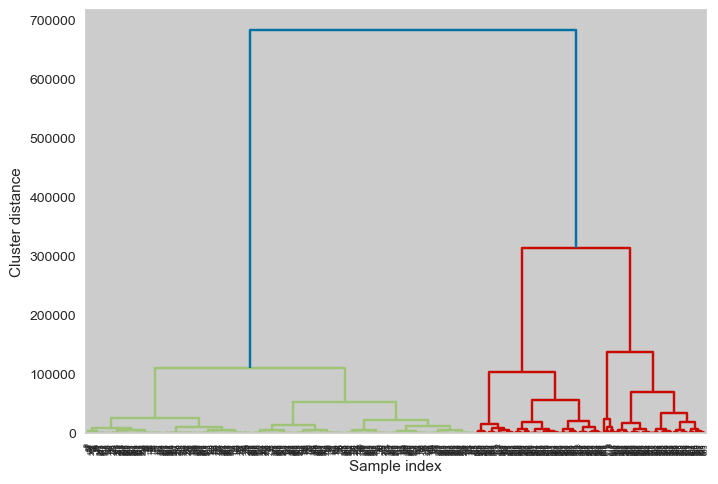

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(df_credit, method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

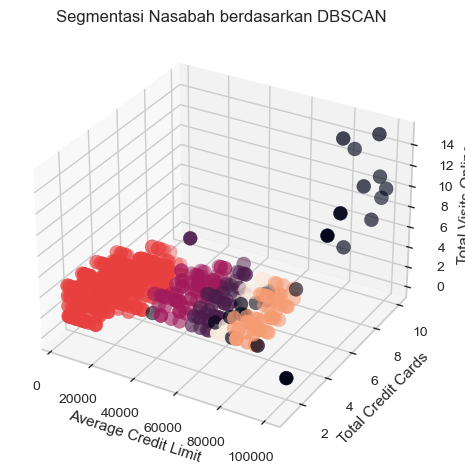

Silhouette Score K-Means: 0.657


In [13]:
DBSC = DBSCAN(min_samples=20, eps=2500)

DBSC_clusters = DBSC.fit_predict(df_credit)

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax. scatter(df_credit['Avg_Credit_Limit'], df_credit['Total_Credit_Cards'], df_credit['Total_visits_online'],
            c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(df_credit, DBSC_clusters))


In [14]:
import pickle

with open('KMeans_model.pkl','wb') as r:
    pickle.dump((kmeans),r)
with open('AGG_model.pkl','wb') as r:
    pickle.dump((AGG),r)
with open('DBSCAN_model.pkl','wb') as r:
    pickle.dump((DBSC),r)
print("Model berhasil disimpan")


Model berhasil disimpan
